In [1]:
# Imports!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import scikit-learn tools!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# Specify a seed so the numbers can be reproduced
np.random.seed(1998)
# Specify size of dataset, randomly generate points
n = 100
x = np.array([np.random.random() for a in range(100)])
# Generate the true Y model with (normally distributed) noise (Y = -pi*x + e)
y = -np.pi*x + np.e
noise = np.random.normal(0,0.25,n)
y += noise
# Convert data into dataframe
df = pd.DataFrame({'X':x,'Y':y})
df.head()

,X,Y
0,0.559446,0.712223
1,0.761492,0.193319
2,0.244532,1.534062
3,0.771689,0.495752
4,0.354472,1.937421


Text(0, 0.5, 'Y')

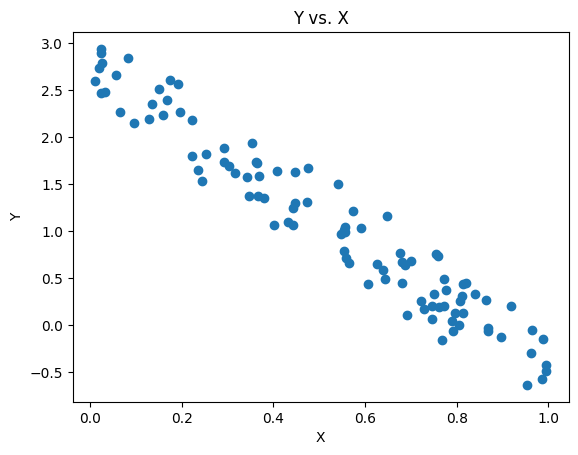

In [10]:
# Let's plot the data!
plt.scatter(df['X'], df['Y'])

plt.title('Y vs. X')
plt.xlabel('X')
plt.ylabel('Y')

## The Sklearn Pipeline

1. Extract features + target

2. Perform train-test split

3. Instantiate your model

4. Fit your model to the training data (model training)

5. (Optional) Save your predictions -- useful if you need some accuracy metric against the known outputs

6. Check accuracy

In [11]:
# Now let's train a linear regression model on our data (for now we will only train once, so we won't have a validation set)

# Extract features and target
X = df[['X']]
Y = df['Y']

# Split the data into a training set and test set using train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate linear regression model
model = LinearRegression()

# Fit the linear regression model to our data
model.fit(train_x, train_y)

# Save test set predictions
predictions = model.predict(test_x)

# Print the R^2 value (how accurate was our model in predicting the y-values)?
print("Score:", model.score(test_x, test_y))

Score: 0.9415613958757891


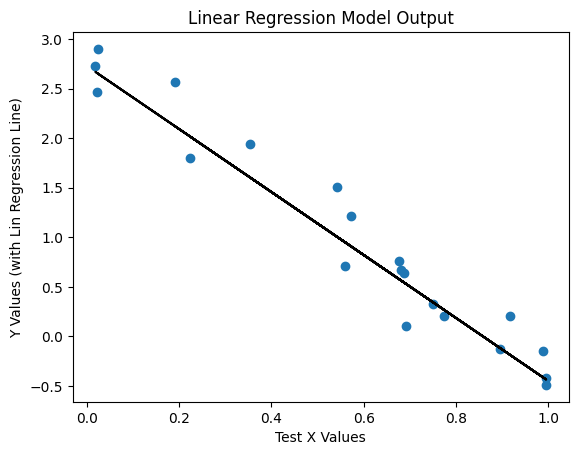

In [12]:
# Look at the output of our linear regression model vs the actual data (test set)

# Plot Predictions
plt.plot(test_x, predictions, c='black')

# Plot Actual Data
plt.scatter(test_x, test_y)

plt.title("Linear Regression Model Output")
plt.xlabel("Test X Values")
plt.ylabel("Y Values (with Lin Regression Line)")

plt.show()

In [13]:
# Look at the slope of our linear model vs the actual slope
print("Learned Slope", str(model.coef_[0]))

print("Actual Slope", str(-np.pi))

Learned Slope -3.177242133397143
Actual Slope -3.141592653589793


In [14]:
# Look at the y-intercept of our model vs the actual intercept
print("Learned Y-Intercept", str(model.intercept_))
print("Actual Y-Intercept", str(np.e))

Learned Y-Intercept 2.728412528588952
Actual Y-Intercept 2.718281828459045


In [8]:
# In the future: how to create a validation set (useful for the HW)
not_testx, test_x, not_testy, test_y = train_test_split(df[['X']], df['Y'], test_size=0.1, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(not_testx, not_testy, test_size=0.1, random_state=42)